<a href="https://colab.research.google.com/github/khan-habibullah/ml1/blob/master/Copy_of_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

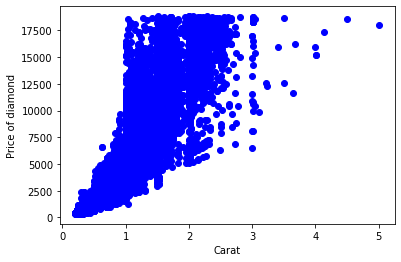

In [ ]:
plt.scatter(df.carat,df.price,color='blue')
plt.xlabel('Carat')
plt.ylabel('Price of diamond')
plt.show()

In [ ]:
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
for i in df:
  if df[i].dtypes=='object':
    df[i]=encoder.fit_transform(df[i])
  else:
    pass

In [ ]:
from sklearn.preprocessing import MinMaxScaler as mms
scaler=mms()
scaled_data=scaler.fit_transform(df)

In [ ]:
normalized_data=pd.DataFrame(scaled_data, columns=df.columns)
x=normalized_data.drop(['price'], axis=1)
y=normalized_data.price


In [ ]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y=tts(x, y, test_size=0.2, random_state=101)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(43152, 9) (43152,) (10788, 9) (10788,)


In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(train_x, train_y)
y_pred=model.predict(test_x)
from sklearn.metrics import mean_squared_error as mse
error= np.sqrt(mse(y_pred, test_y))
print(error)

0.05758166654828673
